#### «Современные методы анализа и прогнозирования в международном бизнесе»
#### Тема: «Регрессионный анализ»

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [226]:
df=pd.read_csv('dataset.csv')

## 1. Подготовка данных

In [228]:
# посмотрим, как выглядит наша таблица
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


Датасетом является таблица объектов недвижимости в Мельбурне. Она содержит следующие категории данных:


Rooms: Количество комнат

Price: Цена в долларах

Method: S - проданная недвижимость; ИП - имущество, проданное ранее; ИП - имущество передано; PN - продано ранее, не разглашается; SN - продано не разглашается; NB - нет ставки; VB - заявка продавца; W - снято до аукциона; SA - продано после аукциона; СС - цена продана после аукциона не разглашается. N / A - цена или максимальная ставка недоступны.

Type: br - спальня (и); h - дом, коттедж, вилла, полулюкс, терраса; u - блок, дуплекс; т - таунхаус; dev site - строительная площадка; o res - другие жилые.

SellerG: Риелтор

Date: Дата продажи

Distance: дистанция от Центрального делового района Мельбурна

Regionname: Общий регион (запад, северо-запад, север, северо-восток и т. Д.)

Propertycount: Количество объектов недвижимости в районе.

Bedroom2 : Количество спален (из разных источников)

Bathroom: Количество ванных комнат

Car: Количество парковочных мест

Landsize: Размер земельного участка

BuildingArea: Размер здания

CouncilArea: Управляющий совет области

In [229]:
# базовая информация о переменных-столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [230]:
# количество строк и столбцов
df.shape

(19740, 21)

### Обработка пустых и некорректных значений

In [231]:
# удалим столбцы, которые не нужны для исследования - адрес, дата и почтовый индекс
df=df.drop(['Address', 'Date','Postcode', 'Method', 'Suburb', 'SellerG', 'Suburb'], axis=1)

In [232]:
# удалим строки, в которых есть значения nan
df=df.dropna()

In [292]:
# таблица существенно уменьшилась, однако количество значений всё ещё достаточно для построения регрессии
df.shape

(6050, 15)

In [234]:
target=df['Price']

In [235]:
# записали переменную Price в отдельную переменную
target

2        1035000.0
4        1465000.0
6        1600000.0
11       1876000.0
14       1636000.0
           ...    
19731     601000.0
19734    1285000.0
19737     750000.0
19738    2450000.0
19739     645000.0
Name: Price, Length: 6050, dtype: float64

In [236]:
# описательная статистика переменной прайс
target.describe()

count    6.050000e+03
mean     1.071520e+06
std      6.744841e+05
min      1.310000e+05
25%      6.250000e+05
50%      8.842500e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6050 entries, 2 to 19739
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6050 non-null   int64  
 1   Type           6050 non-null   object 
 2   Price          6050 non-null   float64
 3   Distance       6050 non-null   float64
 4   Bedroom2       6050 non-null   float64
 5   Bathroom       6050 non-null   float64
 6   Car            6050 non-null   float64
 7   Landsize       6050 non-null   float64
 8   BuildingArea   6050 non-null   float64
 9   YearBuilt      6050 non-null   float64
 10  CouncilArea    6050 non-null   object 
 11  Lattitude      6050 non-null   float64
 12  Longtitude     6050 non-null   float64
 13  Regionname     6050 non-null   object 
 14  Propertycount  6050 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 756.2+ KB


### Подготовка данных

В датасете есть три объектных поля, которые стоит заменить числеными обозначениями:

In [238]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [239]:
df['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Kingston', 'Brimbank', 'Melbourne', 'Hume', 'Knox', 'Melton',
       'Maroondah', 'Greater Dandenong', 'Nillumbik', 'Whittlesea',
       'Frankston', 'Macedon Ranges', 'Yarra Ranges', 'Wyndham', 'Casey',
       'Cardinia'], dtype=object)

In [240]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria',
       'Eastern Victoria', 'Western Victoria'], dtype=object)

Введем для этих значений данных переменных следующие обозначения:

In [241]:
cleanup_nums = {"Regionname": { 
                    'Northern Metropolitan': 1, 
                    'Western Metropolitan': 2,
                    'Southern Metropolitan': 3, 
                    'Eastern Metropolitan': 4,
                    'South-Eastern Metropolitan': 5, 
                    'Northern Victoria': 6,
                    'Eastern Victoria': 7, 
                    'Western Victoria': 8},
                'CouncilArea': {
                    'Yarra': 1, 
                    'Moonee Valley': 2, 
                    'Port Phillip': 3, 
                    'Darebin': 4, 
                    'Hobsons Bay': 5,
                    'Stonnington': 6, 
                    'Boroondara': 7, 
                    'Monash': 8, 
                    'Glen Eira': 9, 
                    'Whitehorse': 10,
                    'Maribyrnong': 11, 
                    'Bayside': 12, 
                    'Moreland': 13, 
                    'Manningham': 14, 
                    'Banyule': 15,
                    'Kingston': 16, 
                    'Brimbank': 17, 
                    'Melbourne': 18, 
                    'Hume': 19, 
                    'Knox': 20, 
                    'Melton': 20,
                    'Maroondah': 21, 
                    'Greater Dandenong': 22, 
                    'Nillumbik': 23, 
                    'Whittlesea': 24,
                    'Frankston': 25, 
                    'Macedon Ranges': 26, 
                    'Yarra Ranges': 27, 
                    'Wyndham': 28, 
                    'Casey': 29, 
                    'Cardinia': 30}, 
                'Type': {
                    'h': 1, 
                    'u': 2, 
                    't': 3}}

In [242]:
obj_df = df.select_dtypes(include=['object'])
obj_df

,Type,CouncilArea,Regionname
2,h,Yarra,Northern Metropolitan
4,h,Yarra,Northern Metropolitan
6,h,Yarra,Northern Metropolitan
11,h,Yarra,Northern Metropolitan
14,h,Yarra,Northern Metropolitan
...,...,...,...
19731,h,Manningham,Northern Victoria
19734,h,Whittlesea,Western Metropolitan
19737,h,Darebin,Western Metropolitan
19738,h,Hume,Western Metropolitan


In [243]:
obj_df = obj_df.replace(cleanup_nums)

In [244]:
obj_df = obj_df.rename(columns={'Type': 'Types', 'CouncilArea': 'Area', 'Regionname': 'Region'}) 
obj_df

,Types,Area,Region
2,1,1,1
4,1,1,1
6,1,1,1
11,1,1,1
14,1,1,1
...,...,...,...
19731,1,14,6
19734,1,24,2
19737,1,4,2
19738,1,19,2


In [245]:
# Заменим столбцы в оригинальном датафрейме на измененные
df['Types']= obj_df['Types']
df['Area']= obj_df['Area']
df['Region']= obj_df['Region']
df=df.drop(['Type', 'CouncilArea','Regionname'], axis=1).copy()
df.head(3)


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Types,Area,Region
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,1,1,1
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,1,1,1
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,1,1,1


Теперь в таблице остались только значения числовых типов

## 2. Гипотезы

Прежде всего стоит построить тепловую карту корреяций между переменными с целью обнаружения предметов исследования

<AxesSubplot:>

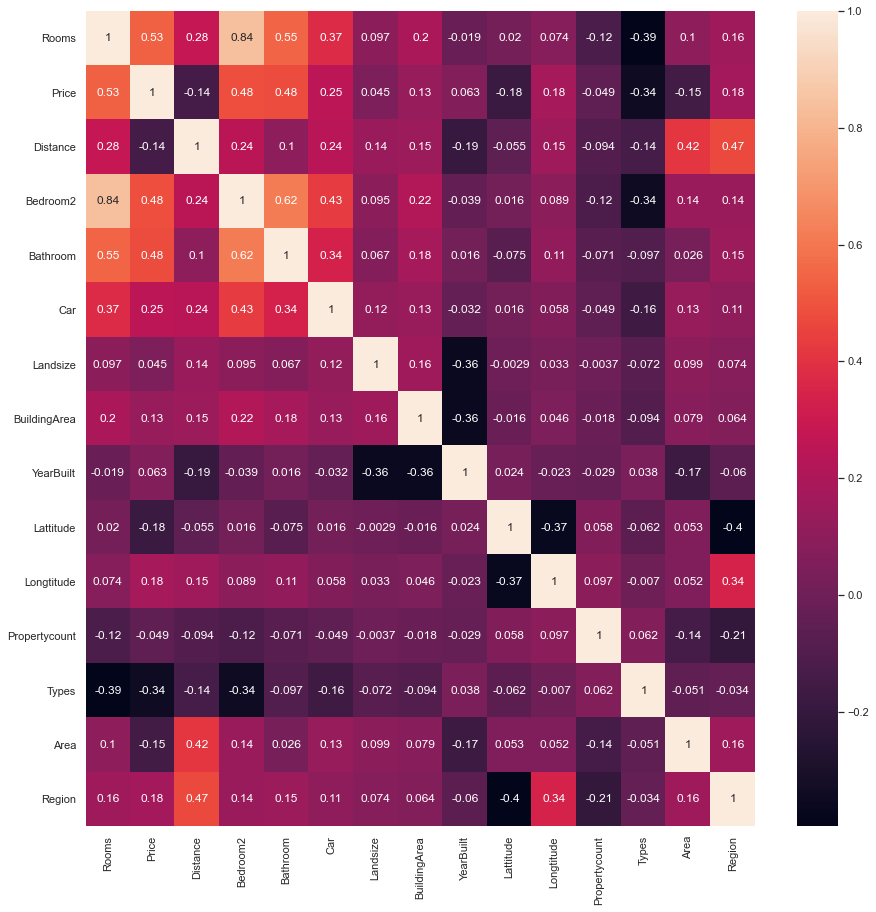

In [259]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(df.corr(), cbar=True, annot=True)

#### Гипотеза №:1 цена коррелирует с количеством комнат

Начнем с очевидного предположения - чем выше количество комнат в доме/квартире - тем выше цена. На тепловой карте видно, насколько высока корреляция между этими параметрами.

#### Гипотеза №:2 количество парковочных мест напрямую коррелирует с количеством комнат

В транспортной экосистеме австралии большую роль играют личные автомобили. Логично предполагать, что чем более вместительный дом - тем больше автомобилей должно быть помещено в на парковочных местах.

#### Гипотеза №:3 Количесво недвижимости возраствает с запада на восток и с юга на север

Так как Мельбурн "огибает" залив Порт-Филлип, находящийся к северо-западу от центра, справедливо предположить, что фонд недвижимости далее вглубь континента богаче.

### Проверка гипотез и анализ

#### Гипотеза №:1 цена коррелирует с количеством комнат

In [353]:
# Проверим, достаточно ли значений для статистики
df['Rooms'].value_counts().sort_index()

1     322
2    1700
3    2495
4    1223
5     272
6      29
7       6
8       3
Name: Rooms, dtype: int64

Так как строк с кол-вом комнат 6, 7, 8 недостаточно для убедительной статистики, исключим эти строки

In [296]:
df_rooms = df.loc[df['Rooms']<=5]

Прежде всего стоит построить график, чтобы понять с чем мы имеем дело

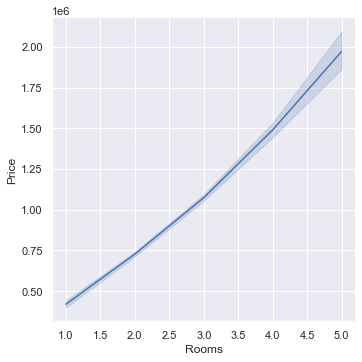

In [297]:
sns.relplot(x='Rooms', y='Price', kind="line", data=df_rooms)

Теперь построим регрессию:

In [298]:
fit = ols('Price ~ Rooms', data=df_rooms).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     2443.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        04:33:49   Log-Likelihood:                -88100.
No. Observations:                6012   AIC:                         1.762e+05
Df Residuals:                    6010   BIC:                         1.762e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.376e+04   2.36e+04     -1.856      0.064      -9e+04    2462.409
Rooms       3.821e+05   7729.765     49.430      0.000    3.67e+05    3.97e+05
==============================================================================
Omnibus:                     3639.254   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80280.501
Skew:                           2.488   Prob(JB):                         0.00
Kurtosis:                      20.196   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Из полученных значений можно заключить следующее:
1. Значение Prob(Omnibus) = 0, что указывает на то, что остатки не распределены нормально.
2. Высокое значение Omnibus указывает на асимметрию, уже обнаруженную визуально на графике.
4. Durbin-Watson ~ 1.3 указывает на то, что гомоскедастичность соблюдена. Это означает, что дисперсия ошибок близка к постоянной. Однако, присутствует слабая положительная автокорреляция.
3. Высокий положительный Skew указывает на то, что нормальное остаточное распределение не соблюдается и свидетельствует о более "толстом хвосте" справа, что так же подтверждается графиком выше.
5. Высокий показатель Jaque-Bera теста так же свидетельствует об отстутствии нормального распределения остатков.

In [352]:
# найдем наценки за кол-во комнат
temp = [df.loc[df['Rooms']==i]['Price'].mean() for i in range(1,6)]
values = []
keys = ["средняя наценка за 2-ю комнату:","средняя наценка за 3-ю комнату:","средняя наценка за 4-ю комнату:","средняя наценка за 5-ю комнату:"]

for i in range(1,5):
    values.append(round(temp[i]-temp[i-1]))

print("\n".join("{}\t{}".format(k, v) for k, v in dict(zip(keys, values)).items()))

средняя наценка за 2-ю комнату:	307793
средняя наценка за 3-ю комнату:	346542
средняя наценка за 4-ю комнату:	416184
средняя наценка за 5-ю комнату:	481706


Заключение:
1. Гипотеза подтверждена - цена прямо зависима от количества комнат в доме/квартире, дополнительная комната обойдется покупателям в среднем в 300 000 - 500 000 долларов.
2. Интересно заметить, что  разброс цен на дома возрастает с повышением кол-ва комнат.
3. Бизнес в сфере продажи недвижимости может использовать информацию о наценке на комнаты при определении ценовой политики и оценивании домов.

#### Гипотеза №:2 количество парковочных мест напрямую коррелирует с количеством комнат

Так как строк с кол-вом комнат 7, 8, 9 недостаточно для убедительной статистики, исключим эти строки

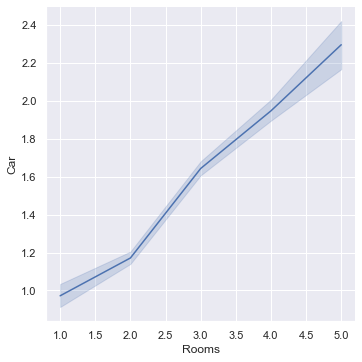

In [299]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.relplot(x='Rooms', y='Car', kind="line", data=df_rooms)

Как мы видим, из графика очевидна прямая зависимость между количеством парковочных мест и комнат, теперь стоит построить регрессию

In [300]:
fit = ols('Price ~ Car', data=df_rooms).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     373.0
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           1.10e-80
Time:                        04:35:32   Log-Likelihood:                -88944.
No. Observations:                6012   AIC:                         1.779e+05
Df Residuals:                    6010   BIC:                         1.779e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.957e+05   1.63e+04     48.922      0.000    7.64e+05    8.28e+05
Car         1.726e+05   8937.839     19.314      0.000    1.55e+05     1.9e+05
==============================================================================
Omnibus:                     3279.008   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42609.105
Skew:                           2.331   Prob(JB):                         0.00
Kurtosis:                      15.181   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Из полученных значений можно заключить следующее:
1. Значение Prob(Omnibus) = 0, что указывает на то, что остатки не распределены нормально.
2. Высокое значение Omnibus указывает на асимметрию, уже обнаруженную визуально на графике.
4. Durbin-Watson ~ 1.4 указывает на то, что гомоскедастичность соблюдена. Это означает, что дисперсия ошибок близка к постоянной. Однако, присутствует слабая положительная автокорреляция.
3. Высокий положительный Skew указывает на то, что нормальное остаточное распределение не соблюдается и свидетельствует о более "толстом хвосте" справа, что так же подтверждается графиком выше.
5. Высокий показатель Jaque-Bera теста так же свидетельствует об отстутствии нормального распределения остатков.

Заключение:
1. Гипотеза подтверждена - количество парковочных мест напрямую коррелирует с количеством комнат в доме.
2. Бизнес в сфере строительства может использовать данную информацию при планировании и проектировании домов.

#### Гипотеза №:3 Количесво недвижимости возраствает с запада на восток и с юга на север

Прежде всего проверим предположение с юга на север и построим график:

(чем ниже Latitude, тем севернее)

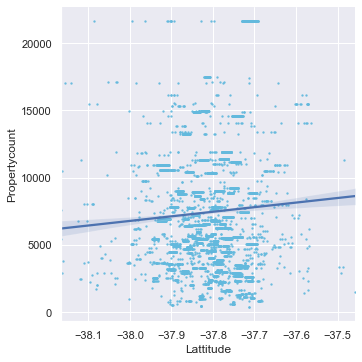

In [247]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.lmplot(x='Lattitude', y='Propertycount', scatter_kws={"s": 2, "color": "#63b9dd"}, data=df)

построим регрессию:

In [288]:
fit = ols('Lattitude ~ Propertycount', data=df_rooms).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Lattitude   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.44
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           6.27e-06
Time:                        03:53:25   Log-Likelihood:                 7161.9
No. Observations:                6041   AIC:                        -1.432e+04
Df Residuals:                    6039   BIC:                        -1.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -37.8160      0.002  -2.01e+04      0.000     -37.820     -37.812
Propertycount  9.888e-07   2.19e-07      4.521      0.000     5.6e-07    1.42e-06
==============================================================================
Omnibus:                      279.380   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.692
Skew:                          -0.322   Prob(JB):                    9.77e-126
Kurtosis:                       4.368   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Из полученных значений можно заключить следующее:
1. Значение Prob(Omnibus) = 0, что указывает на то, что остатки не распределены нормально.
2. Высокое значение Omnibus указывает на асимметричное распределение остатков.
4. Durbin-Watson ~ 0.7 указывает на то, что гомоскедастичность не соблюдена. Это означает, что дисперсия ошибок непостоянна. Кроме того, присутствует значительная положительная автокорреляция.
3. Отрицательный Skew указывает на то, что нормальное остаточное распределение не соблюдается и свидетельствует о более "толстом хвосте" сплева.
5. Высокий показатель Jaque-Bera теста так же свидетельствует об отстутствии нормального распределения остатков.

Теперь посмотрим на распределение запад-восток:

(чем больше Longitude, тем восточней)

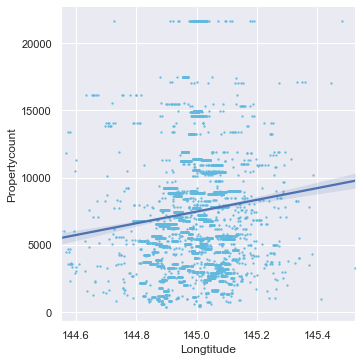

In [248]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.lmplot(x='Longtitude', y='Propertycount', scatter_kws={"s": 2, "color": "#63b9dd"}, data=df)

построим регрессию:

In [287]:
fit = ols('Longtitude ~ Propertycount', data=df_rooms).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Longtitude   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     58.05
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           2.94e-14
Time:                        03:53:06   Log-Likelihood:                 5543.2
No. Observations:                6041   AIC:                        -1.108e+04
Df Residuals:                    6039   BIC:                        -1.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       144.9741      0.002   5.88e+04      0.000     144.969     144.979
Propertycount  2.179e-06   2.86e-07      7.619      0.000    1.62e-06    2.74e-06
==============================================================================
Omnibus:                      301.671   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.131
Skew:                          -0.091   Prob(JB):                    2.33e-236
Kurtosis:                       5.068   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Из полученных значений можно заключить следующее:
1. Значение Prob(Omnibus) = 0, что указывает на то, что остатки не распределены нормально.
2. Высокое значение Omnibus указывает на асимметричное распределение остатков.
4. Durbin-Watson ~ 0.7 указывает на то, что гомоскедастичность не соблюдена. Это означает, что дисперсия ошибок непостоянна. Кроме того, присутствует значительная положительная автокорреляция.
3. Отрицательный Skew указывает на то, что нормальное остаточное распределение не соблюдается и свидетельствует о более "толстом хвосте" сплева. Однако, так как значение мало, этра разница несущественна.
5. Высокий показатель Jaque-Bera теста так же свидетельствует об отстутствии нормального распределения остатков.

Заключение:
1. Гипотеза подтверждена - количество объектов недвижимости возрастает к северо-востоку.
2. Для бизнеса в сфере городского планирования эта информация необходима для определения участков активного создания жилой недвижимости и построения планов застройки.

### Дальнейший анализ

После анализа трех гипотез мы получили четыре одиночные полиномиальные регрессии, однако их результаты указали на то, что ни в одной не соблюдается нормальное распределение остатков. Давайте построим еще несколько моделей, на этот раз множественной регрессии, в надежде найти такую, где соблюдаются все предположения обычного метода наименьших квадратов.

In [129]:
df.head(2)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Types,Area,Region
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,1,1,1
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,1,1,1


In [357]:
fit = ols('Price ~ Distance + Region', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     323.5
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          3.21e-134
Time:                        13:50:02   Log-Likelihood:                -89478.
No. Observations:                6050   AIC:                         1.790e+05
Df Residuals:                    6047   BIC:                         1.790e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.887e+05   2.01e+04     49.171      0.000    9.49e+05    1.03e+06
Distance   -3.554e+04   1695.196    -20.965      0.000   -3.89e+04   -3.22e+04
Region      1.812e+05   8039.658     22.533      0.000    1.65e+05    1.97e+05
==============================================================================
Omnibus:                     3282.613   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45959.683
Skew:                           2.287   Prob(JB):                         0.00
Kurtosis:                      15.705   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [433]:
fit = ols('Price ~ Rooms + Car + Types + Region', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     572.0
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:52:50   Log-Likelihood:                -88613.
No. Observations:                6050   AIC:                         1.772e+05
Df Residuals:                    6044   BIC:                         1.773e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.06e+05   3.68e+04      5.602      0.000    1.34e+05    2.78e+05
Rooms       2.546e+05    1.4e+04     18.230      0.000    2.27e+05    2.82e+05
Car         2.665e+04   8457.689      3.151      0.002    1.01e+04    4.32e+04
Types      -1.633e+05   1.17e+04    -13.926      0.000   -1.86e+05    -1.4e+05
Region      5.567e+04   6254.839      8.900      0.000    4.34e+04    6.79e+04
Bedroom2    6.302e+04    1.4e+04      4.499      0.000    3.56e+04    9.05e+04
==============================================================================
Omnibus:                     3631.003   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83789.940
Skew:                           2.442   Prob(JB):                         0.00
Kurtosis:                      20.565   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [440]:
fit = ols('Price ~ Rooms + Car + Types + Distance', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1067.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:54:25   Log-Likelihood:                -88170.
No. Observations:                6050   AIC:                         1.764e+05
Df Residuals:                    6045   BIC:                         1.764e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.351e+05   3.31e+04     16.186      0.000     4.7e+05       6e+05
Rooms       3.637e+05   8055.830     45.145      0.000    3.48e+05    3.79e+05
Car          7.74e+04   7731.302     10.011      0.000    6.22e+04    9.26e+04
Types      -1.716e+05   1.09e+04    -15.756      0.000   -1.93e+05    -1.5e+05
Distance   -4.164e+04   1272.881    -32.710      0.000   -4.41e+04   -3.91e+04
==============================================================================
Omnibus:                     4068.919   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142125.542
Skew:                           2.732   Prob(JB):                         0.00
Kurtosis:                      26.107   Cond. No.                         60.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [450]:
fit = ols('Price ~ Rooms + Car + Types + Distance', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1067.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:01:16   Log-Likelihood:                -88170.
No. Observations:                6050   AIC:                         1.764e+05
Df Residuals:                    6045   BIC:                         1.764e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.351e+05   3.31e+04     16.186      0.000     4.7e+05       6e+05
Rooms       3.637e+05   8055.830     45.145      0.000    3.48e+05    3.79e+05
Car          7.74e+04   7731.302     10.011      0.000    6.22e+04    9.26e+04
Types      -1.716e+05   1.09e+04    -15.756      0.000   -1.93e+05    -1.5e+05
Distance   -4.164e+04   1272.881    -32.710      0.000   -4.41e+04   -3.91e+04
==============================================================================
Omnibus:                     4068.919   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142125.542
Skew:                           2.732   Prob(JB):                         0.00
Kurtosis:                      26.107   Cond. No.                         60.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
fit = ols('Price ~ Rooms + Car + Types + Distance + Propertycount', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     853.1
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:55:31   Log-Likelihood:                -88170.
No. Observations:                6050   AIC:                         1.764e+05
Df Residuals:                    6044   BIC:                         1.764e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.356e+05   3.59e+04     14.918      0.000    4.65e+05    6.06e+05
Rooms          3.637e+05   8086.672     44.970      0.000    3.48e+05     3.8e+05
Car             7.74e+04   7732.060     10.010      0.000    6.22e+04    9.26e+04
Types         -1.716e+05   1.09e+04    -15.753      0.000   -1.93e+05    -1.5e+05
Distance      -4.164e+04   1275.432    -32.646      0.000   -4.41e+04   -3.91e+04
Propertycount    -0.0500      1.542     -0.032      0.974      -3.072       2.972
==============================================================================
Omnibus:                     4069.027   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142133.867
Skew:                           2.732   Prob(JB):                         0.00
Kurtosis:                      26.108   Cond. No.                     4.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как можно заметить, Omnibus и Jaque-Bera тесты свидетельствуют о том что ни в одной модели не соблюдается нормальное распределенеие остатков.